In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt



In [4]:
def get_formated_poly(poly):
    """
    Return the polynomial such that the coefficient of the maximum power of x 
    is always 1
    """
    ret = poly / poly[0]
    return ret


In [28]:
def get_companion_matrix(poly):
    """
    Calculate the companion matrix for a normalized polynomial
    """
    n = len(poly)
    cmat = np.zeros((n - 1, n - 1))
    cmat[:, n - 2] = (-poly[1:])[::-1]
    cmat[np.arange(1, n - 1), np.arange(0, n - 2)] = 1

    return cmat


In [6]:
def plot_gershgorin_discs(matrix):
    n = len(matrix)
    eigenvalues, _ = np.linalg.eig(matrix)

    fig, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='datalim')

    for i in range(n):
        disc_center = matrix[i, i]
        disc_radius = np.sum(np.abs(matrix[i, :])) - np.abs(matrix[i, i])

        disc = plt.Circle((disc_center, 0), disc_radius, fill=False, color='b', linestyle='dashed')
        ax.add_patch(disc)
        ax.plot(disc_center, 0, 'bo')  # Plot the center of the disc

    ax.set_title('Gershgorin Discs')
    ax.grid(True)
    plt.xlabel('Real')
    plt.ylabel('Imaginary')

    # Plot eigenvalues for reference
    ax.plot(np.real(eigenvalues), np.imag(eigenvalues), 'ro', label='Eigenvalues')

    plt.legend()
    plt.show()



In [7]:
poly = np.array([2, 3, 1, 4, 3, 6])
poly

array([2, 3, 1, 4, 3, 6])

In [24]:
norm_poly = get_formated_poly(poly)
norm_poly

array([1. , 1.5, 0.5, 2. , 1.5, 3. ])

In [29]:
matrix = get_companion_matrix(norm_poly)

matrix

array([[ 0. ,  0. ,  0. ,  0. , -3. ],
       [ 1. ,  0. ,  0. ,  0. , -1.5],
       [ 0. ,  1. ,  0. ,  0. , -2. ],
       [ 0. ,  0. ,  1. ,  0. , -0.5],
       [ 0. ,  0. ,  0. ,  1. , -1.5]])

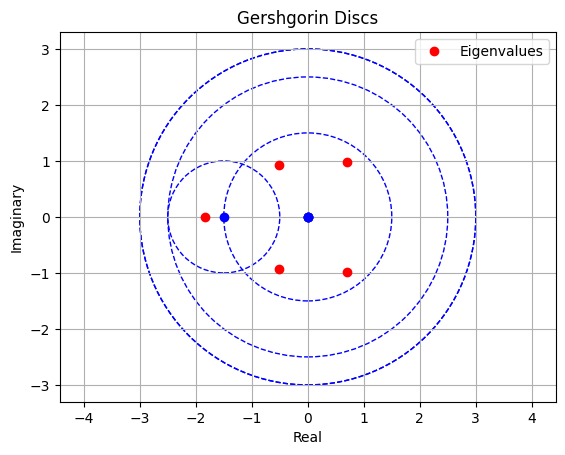

In [30]:
plot_gershgorin_discs(matrix)

In [19]:
(-np.max(np.abs(norm_poly[2:])),
+np.max(np.abs(norm_poly[2:])))

(-3.0, 3.0)

In [22]:
(-norm_poly[1] - 1, -norm_poly[1] + 1)

(-2.5, -0.5)